# Data Cleaning and Exploratory Analysis

## US Shark Attacks, Populations, and Temp Anomalies

Adam Benson <br>
CLaSP 405-002 <br>
Final Project

This notebook gathers data from three sources and ultimately compiles them into one pandas DataFrame to enable further analysis.

The purpose of this project was to determine if shark attacks increase with populations, temperature anomalies, or a combination of both.

### Import Statements

In [2]:
## Import Statements
import pandas as pd                  # DataFrame for analysis
import numpy as np                   # for numerical precision in quantitative operations
import seaborn as sns                # for more stylish plotting
import matplotlib.pyplot as plt      # for basic plotting

import wbdata                        # Python package to find and request information 
                                     # from the World Bank's various databases

import linereg  as lr                #for calculating the error
                                     #on linear fits
    
from scipy import stats              #for linear regression (least-squares fit)

import datetime as dt                # for datetime objects

sns.set_style("darkgrid",
              {'axes.grid' : False})# setting a dark grid style for all visualizations
                                    # removing annoying grid lines

# for visualizations to appear in this notebook
%matplotlib inline

### Accessing World Bank Population Data

Data Source: https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information

Description: US total population from 1960-2017.

Note: World Bank contains no data for 2017

In [5]:
# creating dateranges for API request
dateRanges = (dt.datetime(1960, 1, 1), dt.datetime(2017, 1, 1))

In [4]:
# Making request to get Total Population data for the United States from 1960 - 2017
population_result = wbdata.get_data("SP.POP.TOTL", country=("USA"), data_date=dateRanges)

In [56]:
## How many years of data I retrieved!
len(population_result)

58

In [6]:
# Creating US population DataFrame
populationFrame = pd.DataFrame(population_result)

In [8]:
# Inspecting DataFrame
populationFrame.head()

,country,date,decimal,indicator,value
0,"{'id': 'US', 'value': 'United States'}",2017,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",None
1,"{'id': 'US', 'value': 'United States'}",2016,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",323127513
2,"{'id': 'US', 'value': 'United States'}",2015,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",320896618
3,"{'id': 'US', 'value': 'United States'}",2014,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",318563456
4,"{'id': 'US', 'value': 'United States'}",2013,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",316204908


In [9]:
# changing value of 'country; column to United States
populationFrame['country'] = 'United States'

In [10]:
## Renaming value column to 'total population' to be more informative
populationFrame.rename(columns={'value': 'total population'}, inplace=True)

In [61]:
## Creating numerical values for population totals
populationFrame['total population'] = populationFrame['total population'].apply(pd.to_numeric)

In [62]:
populationFrame.head()

,country,date,decimal,indicator,total population
0,United States,2017,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",NaN
1,United States,2016,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",323127513.0
2,United States,2015,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",320896618.0
3,United States,2014,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",318563456.0
4,United States,2013,0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...",316204908.0


In [63]:
## Creating index of datetime objects
populationFrame.index =  pd.to_datetime(populationFrame.date, format="%Y", errors='coerce')

In [64]:
## Dropping uninformative columns and date because it is used as the index
populationFrame.drop(['decimal','date', 'indicator'], axis='columns', inplace=True)

In [65]:
## Inspecting DataFrame, no data for 2017!!
populationFrame.head()

,country,total population
date,,
2017-01-01,United States,NaN
2016-01-01,United States,323127513.0
2015-01-01,United States,320896618.0
2014-01-01,United States,318563456.0
2013-01-01,United States,316204908.0


In [66]:
## Manually inserting total population for 2017, as estimated by US Census Bureau
populationFrame.loc['2017-01-01', 'total population'] = 325700000

In [67]:
populationFrame.head()

,country,total population
date,,
2017-01-01,United States,325700000.0
2016-01-01,United States,323127513.0
2015-01-01,United States,320896618.0
2014-01-01,United States,318563456.0
2013-01-01,United States,316204908.0


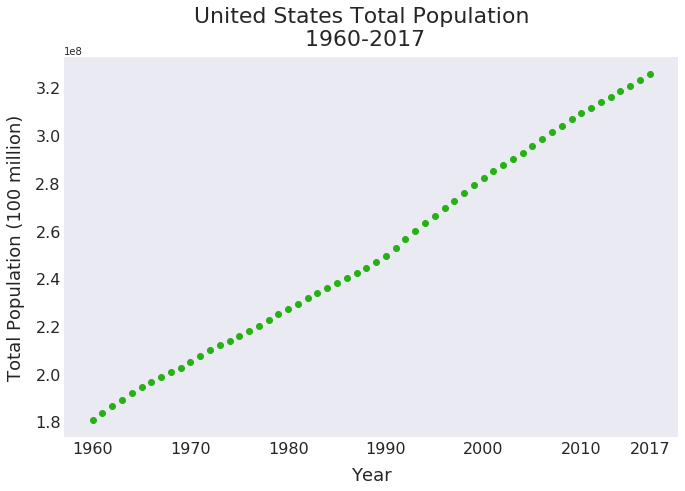

In [68]:
## Plotting US total population with respect to time

fig = plt.figure(figsize=(11,7))

plt.scatter(populationFrame.index, populationFrame['total population'], color = '#26B214')


plt.suptitle('United States Total Population\n 1960-2017', fontsize=22)

plt.ylabel('Total Population (100 million)', rotation=90,
           labelpad=10, fontsize=18)

plt.xlabel('Year', fontsize=18, labelpad=10)


plt.yticks(fontsize=16)
plt.xticks(rotation=0, fontsize=16)

# changing background color for title, axis ticks, and axis labels.
fig.set_facecolor('none')

# changing xticks
plt.xticks(['1960', '1970', '1980', '1990', '2000', '2010', '2017'])

plt.savefig('US Population 1960-2017', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

### Loading Data (NOAA Temperature)

Data Source : https://www.ncdc.noaa.gov/cag/national/ 

Description : National Time Series of Contiguous U.S Average Temperature, 12-month, 1960-2017

In [69]:
## Us Land temperature values and anomalies 
## Departure from mean(52.02 F) 1901-2000 base period (20th century average)
usLandTemps = pd.read_csv('Data/US-tavg-12-1-1960-2017.txt', header=4)

In [70]:
## Inspecting DataFrame
usLandTemps.head()

,Date,Value,Anomaly
0,196001,52.10,0.08
1,196101,51.46,-0.56
2,196201,51.64,-0.38
3,196301,51.69,-0.33
4,196401,52.85,0.83


In [71]:
usLandTemps.tail()

,Date,Value,Anomaly
53,201301,54.96,2.94
54,201401,52.29,0.27
55,201501,52.75,0.73
56,201601,54.33,2.31
57,201701,55.03,3.01


In [72]:
## renaming columns to be more informative
usLandTemps.rename(columns={'Value': 'Temp (F)', 'Anomaly': 'Anomaly (F)'}, inplace=True)

In [73]:
usLandTemps.head()

,Date,Temp (F),Anomaly (F)
0,196001,52.10,0.08
1,196101,51.46,-0.56
2,196201,51.64,-0.38
3,196301,51.69,-0.33
4,196401,52.85,0.83


In [74]:
## Creating index of datetime objects
usLandTemps.index =  pd.to_datetime(usLandTemps.Date, format="%Y%d", errors='coerce')

In [75]:
## Inspecting DataFrame
usLandTemps.head()

,Date,Temp (F),Anomaly (F)
Date,,,
1960-01-01,196001,52.10,0.08
1961-01-01,196101,51.46,-0.56
1962-01-01,196201,51.64,-0.38
1963-01-01,196301,51.69,-0.33
1964-01-01,196401,52.85,0.83


In [76]:
usLandTemps.tail()

,Date,Temp (F),Anomaly (F)
Date,,,
2013-01-01,201301,54.96,2.94
2014-01-01,201401,52.29,0.27
2015-01-01,201501,52.75,0.73
2016-01-01,201601,54.33,2.31
2017-01-01,201701,55.03,3.01


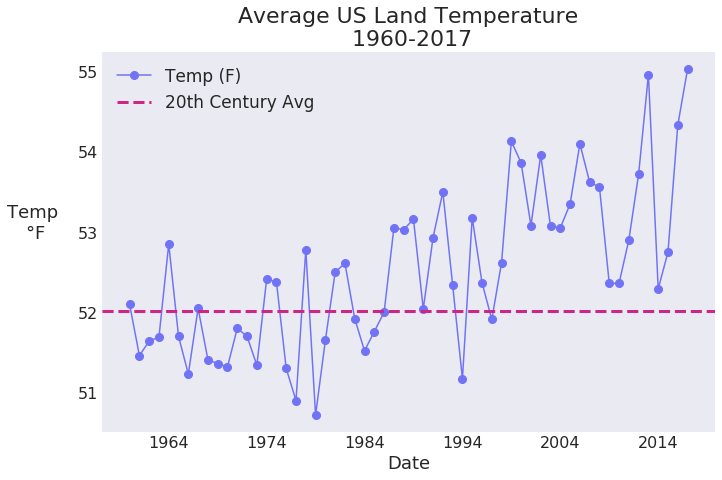

In [77]:
## plotting US land temperature with respect to time

fig = plt.figure(figsize=(11,7))

plt.plot(usLandTemps.index, usLandTemps['Temp (F)'], 
         marker='o', markersize = 8, color='#7173F6')


## horizontal line at 20th century average
plt.axhline(y=52.02, color='#D12586', linestyle = '--', 
            linewidth=3, label = "20th Century Avg")

plt.legend(prop={'size': 17})


plt.title("Average US Land Temperature\n 1960-2017", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Temp\n $\degree$F", rotation=0, fontsize=18, labelpad=45)

fig.set_facecolor('none')

plt.savefig('RawUSTemps.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

### Loading Data (Global Shark Attack File)

Data Source: http://www.sharkattackfile.net/incidentlog.htm

Description: Chronoligical report of all reported shark attacks across the globe from 1750 to present day

In [12]:
## Creating DataFrame of all incidents from Global Shark Attack File
globalSharkFile = pd.read_excel('Data/GSAF5.xls', encoding='latin-1')

In [13]:
## Inspecting DataFrame
globalSharkFile.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,NaN,TrackingSharks.com,2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6258.0,NaN,NaN
1,2018.03.31,31-Mar-2018,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,...,"Tiger shark, 12'","Khon2, 3/31/2018",2018.03.31-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.31,2018.03.31,6257.0,NaN,NaN
2,2018.03.14,14-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,Wading,Luke Guy & Finn Bald,M,...,Wobbegong shark,"B. Myatt, GSAF",2018.03.14-WatermansBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.14,2018.03.14,6256.0,NaN,NaN
3,2018.03.09.b,9-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,...,3.5 m shark,"B. Myatt, GSAF",2018.03.09.b-Crossland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.b,2018.03.09.b,6255.0,NaN,NaN
4,2018.03.09.a,9-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,...,1.8 m shark,"B. Myatt, GSAF",2018.03.09.a-Weight.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.a,2018.03.09.a,6254.0,NaN,NaN


In [14]:
## Number of countries in shark attack file
print("There are {} countries included in this data.".format(len(globalSharkFile['Country'].unique())))

There are 212 countries included in this data.


In [15]:
## Removing whitespace from country names
globalSharkFile.Country = globalSharkFile.Country.str.strip()

In [16]:
print("There are {} countries included in this data".format(len(globalSharkFile.Country.unique())))

There are 204 countries included in this data


In [17]:
## nearly 26000 shark attacks included!
globalSharkFile.shape

(25707, 24)

## Selecting US Shark Attacks

In [19]:
## United States Attacks
usAttacks = globalSharkFile[globalSharkFile['Country'] == 'USA']

In [20]:
## number of entries for US attacks
usAttacks.shape

(2219, 24)

In [21]:
## Inspecting data
usAttacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1,2018.03.31,31-Mar-2018,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,...,"Tiger shark, 12'","Khon2, 3/31/2018",2018.03.31-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.31,2018.03.31,6257.0,NaN,NaN
16,2017.12.31,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjoirie Mariano,F,...,Tiger shark,"J. Howard, Surfling Now, 1/2/2018",2017.12.31-Mariano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.31,2017.12.31,6242.0,NaN,NaN
17,2017.12.30,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,...,NaN,R. Collier,2017.12.30.Jones.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.30,2017.12.30,6241.0,NaN,NaN
23,2017.11.24,24-Nov-2017,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,...,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6235.0,NaN,NaN
24,2017.11.18,18-Nov-2017,2017.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,...,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6234.0,NaN,NaN


### Cleaning Shark Data

In [22]:
#inspecting column names
usAttacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [23]:
usAttacks.Area.unique()
## There are two Floridas due to whitespace!!!

array(['Hawaii', 'California', 'Florida', 'New York', 'Texas',
       'Massachusetts', 'South Carolina', 'New Jersey', 'Washington',
       'Oregon', 'Alabama', 'North Carolina', 'Maryland', 'Louisiana',
       'Delaware', 'Palmyra Atoll', 'Georgia', 'Puerto Rico', 'Maine',
       'Virginia', 'US Virgin Islands', 'Kentucky', 'Guam', 'New Mexico',
       'South Carolina ', 'Johnston Atoll', 'Alaska', 'Missouri',
       'Mississippi', 'North Carolina ', 'Rhode Island',
       'North & South Carolina', 'Florida ', nan, 'Connecticut',
       'Pennsylvania', 'Illinois', 'Wake Island', ' North Carolina',
       'Midway Atoll', 'East coast', ' New Jersey', 'New York ', 'CUBA'], dtype=object)

In [24]:
## removing whitespace from Area columns
usAttacks.Area = usAttacks.Area.str.strip()

/home/adam/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
# dropping useless columns
usAttacks.drop(['Investigator or Source', 'pdf', 'href formula', 'href',
                   'Case Number.1', 'Case Number.2', 'original order', 'original order', 'Unnamed: 22',
                   'Unnamed: 23', 'Date', 'Case Number'], axis=1, inplace=True)

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
# creating numerical count value for each entry
usAttacks['Count'] = 1

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
## Creating new columns to enhance analysis
# Fatality column
usAttacks['Fatal'] = 0

# Non-Fatal column
usAttacks['Non-Fatal'] = 0

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
## Creating counts for fatality and non fatality

for index,row in usAttacks.iterrows():
    # Chcecking for fatal attacks
    if row['Fatal (Y/N)'] == 'Y':
        usAttacks.at[index,'Fatal'] = 1
    # Checking for non-fatal attacks
    if row['Fatal (Y/N)'] == 'N':
        usAttacks.at[index,'Non-Fatal'] = 1

In [29]:
usAttacks.head()

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Count,Fatal,Non-Fatal
1,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N,09h30,"Tiger shark, 12'",1,0,1
16,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjoirie Mariano,F,54,Severe lacerations to left thigh & knee,N,18h00,Tiger shark,1,0,1
17,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N,12h00,NaN,1,0,1
23,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,Right leg bitten,N,13h45,"White shark, 4.6 m",1,0,1
24,2017.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,Heel bitten,N,Late afternoon,NaN,1,0,1


In [30]:
print(usAttacks.loc[17])

Year                                               2017
Type                                         Unprovoked
Country                                             USA
Area                                         California
Location       Drakes Estero, Point Reyes, Marin County
Activity                                        Surfing
Name                                      Natalie Jones
Sex                                                   F
Age                                                  35
Injury                                      Foot bitten
Fatal (Y/N)                                           N
Time                                              12h00
Species                                             NaN
Count                                                 1
Fatal                                                 0
Non-Fatal                                             1
Name: 17, dtype: object


In [31]:
## Writing to excel file to check formatting and inspect full data
usAttacks.to_excel('UsAttacks.xls')

### Re-Indexing Shark Data

In [32]:
## Creating datetime objects and ignoring bad entries (making NaT)
usAttacks.Year = pd.to_datetime(globalSharkFile['Year'], format="%Y.0", errors='coerce')

/home/adam/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
usAttacks.head()

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Count,Fatal,Non-Fatal
1,2018-01-01,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N,09h30,"Tiger shark, 12'",1,0,1
16,2017-01-01,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjoirie Mariano,F,54,Severe lacerations to left thigh & knee,N,18h00,Tiger shark,1,0,1
17,2017-01-01,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N,12h00,NaN,1,0,1
23,2017-01-01,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,Right leg bitten,N,13h45,"White shark, 4.6 m",1,0,1
24,2017-01-01,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,Heel bitten,N,Late afternoon,NaN,1,0,1


Looking at Massachusetts

In [34]:
usAttacks.index = usAttacks['Year']

In [35]:
maAttacks = usAttacks[usAttacks['Area'] == 'Massachusetts']

In [36]:
maAttacks = maAttacks[(maAttacks.index >= pd.datetime(1960,1,1)) & (maAttacks.index<=pd.datetime(2018,1,1))]

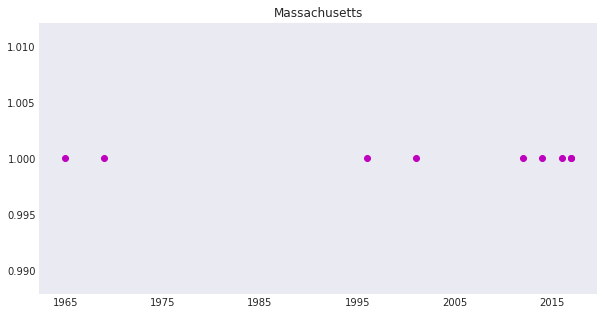

In [38]:
fig = plt.figure(figsize=(10,5))

plt.scatter(maAttacks.index, maAttacks['Count'], color='m')
plt.title("Massachusetts")

plt.savefig("Massachusetts.png")
plt.show()

The concentration of Massachusetts attacks seems to be in recent years :(, which supports my observation that shark sightings in my are are increasing.

In [41]:
## looking at NaT datetime values
usAttacks.tail()

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Count,Fatal,Non-Fatal
Year,,,,,,,,,,,,,,,,
NaT,NaT,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N,NaN,NaN,1,0,1
NaT,NaT,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,2-inch lacerations,N,NaN,NaN,1,0,1
NaT,NaT,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,1,0,1
NaT,NaT,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,1,0,1
NaT,NaT,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,1,1,0


In [43]:
usAttacks.drop(columns='Year', inplace=True)

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Yearly Attacks in the United States

In [44]:
## creating yearly attacks
yearlyusAttacks = usAttacks.groupby(['Year']).sum()

In [114]:
yearlyusAttacks.rename(columns={'Count': 'Total Attacks'}, inplace=True)

In [115]:
yearlyusAttacks.head()

,Total Attacks,Fatal,Non-Fatal
Year,,,
1751-01-01,1,1,0
1771-01-01,1,1,0
1779-01-01,1,1,0
1780-01-01,1,1,0
1803-01-01,1,0,1


In [116]:
yearlyusAttacks.tail()

,Total Attacks,Fatal,Non-Fatal
Year,,,
2014-01-01,66,0,63
2015-01-01,72,1,64
2016-01-01,64,0,59
2017-01-01,65,0,58
2018-01-01,1,0,1


In [117]:
usAttacks.shape

(2219, 16)

In [118]:
import matplotlib.ticker as mtick

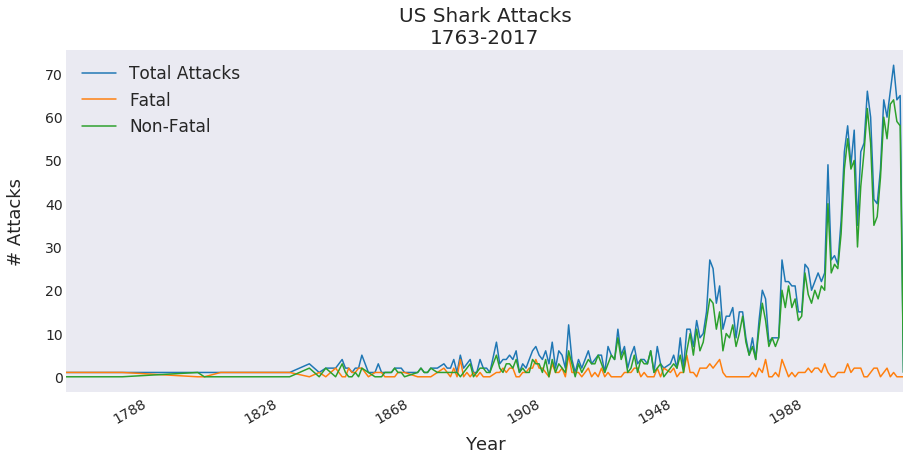

In [55]:
## time series plot of US shark attacks
yearlyusAttacks.plot(figsize=(15,7))

plt.title('US Shark Attacks\n1763-2017', fontsize=20)

fig.set_facecolor('none')


plt.xlim(dt.datetime(1763,1,1), dt.datetime(2018,1,1))


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Year", fontsize=18, labelpad=10)
plt.ylabel("# Attacks", rotation=90, fontsize=18, labelpad=20)

x_data = np.arange(1763,2018,1)

plt.legend(prop={'size':17}, loc='best')


plt.savefig('RawUSAttacks.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

## Creating Combined DataFrame

In [131]:
## Range of Years for Analysis
startYear = 1960
endYear = 2017

## because np.arange goes up to, but does not include end date, using +1
sharkAnalysis = pd.DataFrame(index = np.arange(startYear, endYear+1, 1))

In [132]:
## setting date index for 1960-2017
dateIndex = ((yearlyusAttacks.index >= dt.datetime(startYear, 1, 1)) & 
            (yearlyusAttacks.index <= dt.datetime(endYear, 1, 1)))

## creating column, total attacks, with data from shark attack dataframe 
## using the range of 1960-2017
sharkAnalysis['Total Attacks'] = yearlyusAttacks.loc[dateIndex, 'Total Attacks'].values

In [133]:
sharkAnalysis.tail()

,Total Attacks
2013,60
2014,66
2015,72
2016,64
2017,65


In [134]:
## creating date index for temperature data
tempDateIndex = ((usLandTemps.index >= dt.datetime(startYear, 1, 1)) & 
                (usLandTemps.index <= dt.datetime(endYear, 1, 1)))


In [135]:
## creating a new 
sharkAnalysis['Temp Anomaly (F)'] = usLandTemps.loc[tempDateIndex, 'Anomaly (F)'].values

In [136]:
sharkAnalysis.head()

,Total Attacks,Temp Anomaly (F)
1960,25,0.08
1961,17,-0.56
1962,21,-0.38
1963,11,-0.33
1964,14,0.83


In [137]:
## creating date index for population data
populationIndex = ((populationFrame.index >= dt.datetime(startYear, 1, 1)) & 
                   (populationFrame.index <= dt.datetime(endYear, 1, 1)))

In [138]:
## reversed array of values
# populationFrame.loc[populationIndex, 'total population'].values[::-1]

In [139]:
## for some reason, I must use the reversed array :P
sharkAnalysis['Total Population'] = populationFrame.loc[populationIndex, 'total population'].values[::-1]

In [140]:
sharkAnalysis['Normalized Data'] = sharkAnalysis['Total Attacks'] / sharkAnalysis['Total Population']

In [141]:
sharkAnalysis.head()

,Total Attacks,Temp Anomaly (F),Total Population,Normalized Data
1960,25,0.08,180671000.0,1.383731e-07
1961,17,-0.56,183691000.0,9.254672e-08
1962,21,-0.38,186538000.0,1.125776e-07
1963,11,-0.33,189242000.0,5.812663e-08
1964,14,0.83,191889000.0,7.295885e-08


In [142]:
## multiplying by 10,000,000 to make values appear in plot
sharkAnalysis['Normalized Data'] = sharkAnalysis['Normalized Data'] * 10000000

In [143]:
sharkAnalysis.head()

,Total Attacks,Temp Anomaly (F),Total Population,Normalized Data
1960,25,0.08,180671000.0,1.383731
1961,17,-0.56,183691000.0,0.925467
1962,21,-0.38,186538000.0,1.125776
1963,11,-0.33,189242000.0,0.581266
1964,14,0.83,191889000.0,0.729588


In [144]:
## creating color column with base color set to green
sharkAnalysis['Colors'] = 'g'

In [163]:
for index,row in sharkAnalysis.iterrows():
    
    #check if greater than 0
    if row['Temp Anomaly (F)'] > 0:
        #set value in array as red
        sharkAnalysis.at[index, 'Colors'] = '#C6221E'
    
    #check if less than 0, or equal to
    if row['Temp Anomaly (F)'] <= 0:
        #set value in array as blue
        sharkAnalysis.at[index, 'Colors'] = '#2592D1'

Calculating error on # Shark Attacks (counts)

In [165]:
sharkAnalysis['Upper Confidence'] = sharkAnalysis['Total Attacks'] + np.sqrt(sharkAnalysis['Total Attacks'])

In [166]:
sharkAnalysis['Lower Confidence'] = sharkAnalysis['Total Attacks'] - np.sqrt(sharkAnalysis['Total Attacks'])

In [167]:
sharkAnalysis.head()

,Total Attacks,Temp Anomaly (F),Total Population,Normalized Data,Colors,Upper Confidence,Lower Confidence,N Upper Confidence,N Lower Confidence
1960,25,0.08,180671000.0,1.383731,#C6221E,30.000000,20.000000,1.660477,1.106985
1961,17,-0.56,183691000.0,0.925467,#2592D1,21.123106,12.876894,1.149926,0.701008
1962,21,-0.38,186538000.0,1.125776,#2592D1,25.582576,16.417424,1.371440,0.880112
1963,11,-0.33,189242000.0,0.581266,#2592D1,14.316625,7.683375,0.756525,0.406008
1964,14,0.83,191889000.0,0.729588,#C6221E,17.741657,10.258343,0.924579,0.534598


In [168]:
## Normalized Upper Confidence
sharkAnalysis['N Upper Confidence'] = (sharkAnalysis['Upper Confidence']/sharkAnalysis['Total Population']) * 10000000

In [169]:
## Normalized Lower Confidence
sharkAnalysis['N Lower Confidence'] = (sharkAnalysis['Lower Confidence']/sharkAnalysis['Total Population']) * 10000000

In [170]:
sharkAnalysis.head(3)

,Total Attacks,Temp Anomaly (F),Total Population,Normalized Data,Colors,Upper Confidence,Lower Confidence,N Upper Confidence,N Lower Confidence
1960,25,0.08,180671000.0,1.383731,#C6221E,30.000000,20.000000,1.660477,1.106985
1961,17,-0.56,183691000.0,0.925467,#2592D1,21.123106,12.876894,1.149926,0.701008
1962,21,-0.38,186538000.0,1.125776,#2592D1,25.582576,16.417424,1.371440,0.880112


In [171]:
## writing CSV file
sharkAnalysis.to_csv('SharkAnalysis.csv')

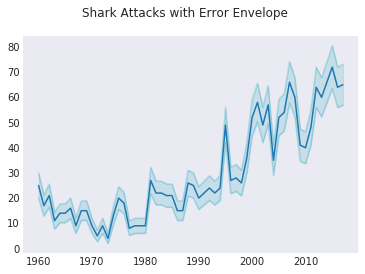

In [172]:
##-------------------------
plt.plot(sharkAnalysis.index, sharkAnalysis['Total Attacks'])

##-------------------------
## plotting error envelope

plt.plot(sharkAnalysis.index, sharkAnalysis['Upper Confidence'],
        alpha=0.3, color='#39AEC2')

plt.plot(sharkAnalysis.index, sharkAnalysis['Lower Confidence'],
        alpha=0.3, color='#39AEC2')

plt.fill_between(sharkAnalysis.index, sharkAnalysis['Lower Confidence'],
                 sharkAnalysis['Upper Confidence'], alpha=0.2, color='#39AEC2')


##-------------------------
plt.suptitle('Shark Attacks with Error Envelope')

plt.show()

### Exploratory Visualizations

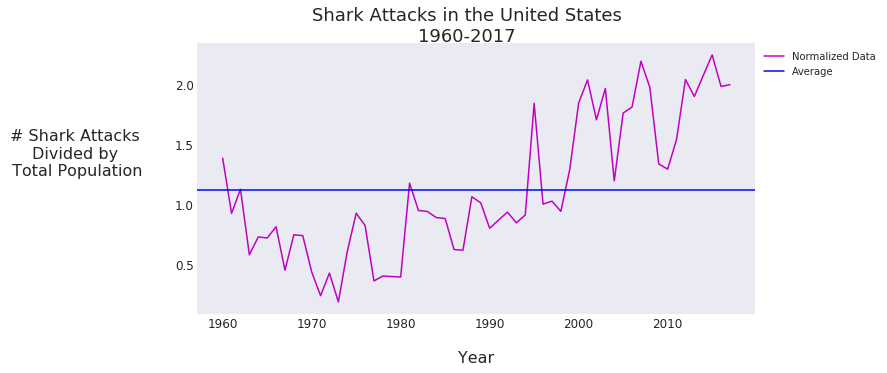

In [173]:
fig = plt.figure(figsize=(10,5))

sharkAnalysis['Normalized Data'].plot(color='m')

plt.suptitle("Shark Attacks in the United States\n1960-2017", fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(y=sharkAnalysis['Normalized Data'].mean(), color='b', label='Average')

plt.legend(bbox_to_anchor=(1,1))

## informative x,y labels
plt.ylabel("# Shark Attacks\nDivided by\n Total Population", rotation=0, fontsize=16, labelpad=100)
plt.xlabel("Year", fontsize=16, labelpad=20)
plt.show()

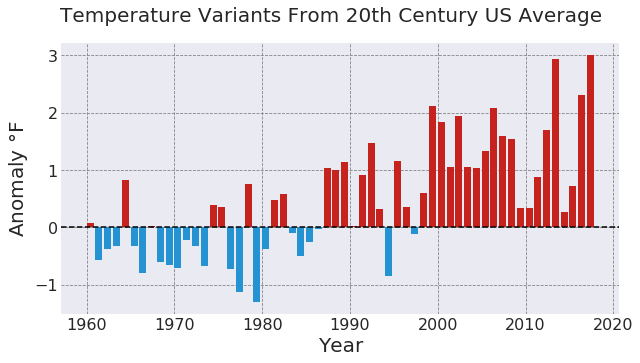

In [175]:
## Temperature Anomalies
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 20th Century US Average', fontsize=20)


plt.bar(sharkAnalysis.index, sharkAnalysis['Temp Anomaly (F)'], width = 0.8, align='edge',
        color=sharkAnalysis['Colors'])

#------------------------------------------------

plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## 20th century mean
plt.axhline(y=0.0, color='k', linestyle='--', label='20th century mean (0)')


plt.grid(color='gray', linestyle='dashed')

### Multiplot

In [176]:
### Multiplot of Shark attacks and temperature Anomalies

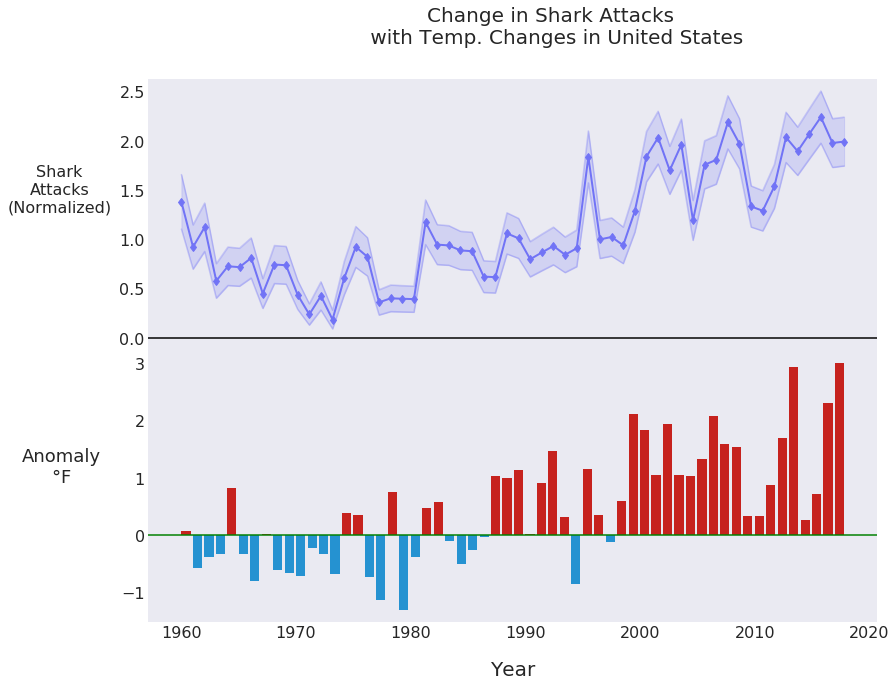

In [177]:
fig = plt.figure(figsize=(15, 10))
#added newline character to make multilevel title
fig.suptitle('Change in Shark Attacks \n with Temp. '+ 
             'Changes in United States', fontsize=20)

#-----------------------------------------CHANGE REDUCED hspace to 0
gs = plt.GridSpec(2, 1, hspace=0.0, wspace=0.0, right = 0.8)
#-----------------------------------------
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
#------------------------------------------------

ax1.plot(sharkAnalysis.index, sharkAnalysis['Normalized Data'],
         lw=2, marker='d', color="#7173F6")

ax1.axhline(y=0.0, color='k', linestyle='-') #add a horizontal line at 0

ax1.set_ylabel('Shark\nAttacks\n(Normalized)', rotation=0, labelpad=60, fontsize = 16)
ax1.tick_params(labelsize=16)
#------------------------------------------------

## plotting error envelope for shark attacks
## Error for counts = x(best) +/- sqrt(x best)

ax1.plot(sharkAnalysis.index, sharkAnalysis['N Upper Confidence'],
        alpha=0.3, color='#7173F6')

ax1.plot(sharkAnalysis.index, sharkAnalysis['N Lower Confidence'],
        alpha=0.3, color='#7173F6')

ax1.fill_between(sharkAnalysis.index, sharkAnalysis['N Lower Confidence'],
                 sharkAnalysis['N Upper Confidence'], alpha=0.2, color='#7173F6')


#------------------------------------------------
#------------------------------------------------

ax2.bar(sharkAnalysis.index, sharkAnalysis['Temp Anomaly (F)'], width = 0.8, align='edge',
        color=sharkAnalysis['Colors'])

#------------------------------------------------

ax2.set_ylabel('Anomaly\n$\degree$F', rotation=0, labelpad=60, fontsize = 18)
ax2.set_xlabel('Year', fontsize = 20, labelpad=20)

ax2.tick_params(labelsize=16)


## 20th century mean
ax2.axhline(y=0.0, color='g', linestyle='-', label='20th century mean (0)')

#------------------------------------------------
#------------------------------------------------
fig.set_facecolor('none')

plt.savefig('Attacks-Temps.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

## For the final statistical analysis performed, see the "Statistical Analysis" jupyter notebook.

### Seaborn Linear Regression + Pearson Correlation Coefficient

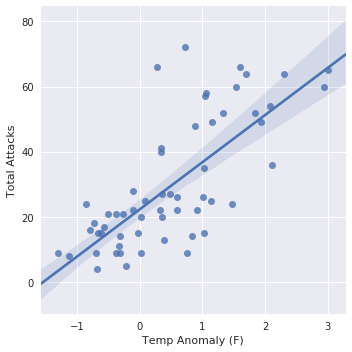

In [66]:
sns.lmplot(x='Temp Anomaly (F)', y='Total Attacks', data=sharkAnalysis,
           robust=True)

plt.show()

In [73]:
## Pearson Correlation Coefficient
sharkAnalysis['Temp Anomaly (F)'].corr(sharkAnalysis['Total Attacks'], method='pearson')

0.74111637788640639

In [91]:
sharkAnalysis['Total Attacks'].describe()

count    58.000000
mean     30.086207
std      19.625694
min       4.000000
25%      15.000000
50%      23.000000
75%      48.750000
max      72.000000
Name: Total Attacks, dtype: float64